In [1]:
# Importing required Libraries

import tensorflow as tf
import pandas as pd
import string
import re
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import nltk
import spacy
import sys
from spacy.lang.en import English
import en_core_web_sm
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

print(tf.__version__)  

C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\tensorflow\pyth

1.14.0


In [2]:
import pandas as pd

df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df = df[['headline', 'is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [3]:
df['headline'] = df.headline.apply(lambda x:x.lower())  # convert all words in headline into lower case 
df['headline'] = df.headline.apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))  # remove all punctuations in headline


In [4]:
df['headline_count'] = df.headline.apply(lambda x: len(list(x.split())))
df['headline_unique_word_count'] = df.headline.apply(lambda x: len(set(x.split())))
df['headline_has_digits'] = df.headline.apply(lambda x: bool(re.search(r'\d', x)))
df

,headline,is_sarcastic,headline_count,headline_unique_word_count,headline_has_digits
0,former versace store clerk sues over secret bl...,0,12,12,False
1,the roseanne revival catches up to our thorny ...,0,14,14,False
2,mom starting to fear son's web series closest ...,1,14,13,False
3,boehner just wants wife to listen not come up ...,1,13,13,False
4,j.k rowling wishes snape happy birthday in the...,0,11,11,False
...,...,...,...,...,...
26704,american politics in moral free-fall,0,5,5,False
26705,america's best 20 hikes,0,4,4,True
26706,reparations and obama,0,3,3,False
26707,israeli ban targeting boycott supporters raise...,0,8,8,False


In [5]:
nlp = en_core_web_sm.load()
parser = English()
en_stop = set(nltk.corpus.stopwords.words('english'))


def tokenize(text):
    """this function is to tokenize the headline into a list of individual words"""
    lda_tokens = []
    tokens = parser(text)  # need to use parser for python to treat the list as words
    for token in tokens:
        if token.orth_.isspace():  # to ignore any whitespaces in the headline, so that token list does not contain whitespaces 
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)   # tokens (headlines) are already in lowercase
    return lda_tokens


def get_lemma(word):
    """this function is to lemmatize the words in a headline into its root form"""
    lemma = wn.morphy(word)  # converts the word into root form from wordnet
    if lemma is None:
        return word
    else:
        return lemma
    

def prepare_text_for_lda(text):
    tokens = tokenize(text)  # parse and tokenize the headline into a list of words
    tokens = [token for token in tokens if len(token) > 4]  # remove headlines with only length of 4 words or less
    tokens = [token for token in tokens if token not in en_stop]  # remove stopwords in the headline
    tokens = [get_lemma(token) for token in tokens]  # lemmatize the words in the headline
    return tokens

In [6]:
text_data = []
for headline in df.headline:
    tokens = prepare_text_for_lda(headline)
    text_data.append(tokens)
    
text_data

[['former',
  'versace',
  'store',
  'clerk',
  'secret',
  'black',
  'minority',
  'shopper'],
 ['roseanne', 'revival', 'catch', 'thorny', 'political', 'better', 'worse'],
 ['starting', 'series', 'close', 'thing', 'grandchild'],
 ['boehner', 'want', 'listen', 'alternative', 'reduction', 'idea'],
 ['rowling', 'wish', 'snape', 'happy', 'birthday', 'magical'],
 ['advance', 'world', 'woman'],
 ['fascinate', 'eating', 'grow'],
 ['school', 'company'],
 ['snake', 'handler', 'leaf', 'sinking', 'huckabee', 'campaign'],
 ['friday', 'morning', 'email', 'inside', 'trump', 'presser'],
 ['airline', 'passenger', 'tackle', 'rush', 'cockpit', 'threat'],
 ['facebook', 'reportedly', 'working', 'healthcare', 'feature'],
 ['north', 'korea', 'praise', 'trump', 'urge', 'voter', 'reject', 'hillary'],
 ['actually', 'jeffrey', 'indefensible'],
 ['barcelona', 'hold', 'protest', 'support', 'refugee'],
 ['nuclear', 'detonate', 'rehearsal', 'spider', 'musical'],
 ['cosby', 'lawyer', 'accuser', 'forward', 'smear'

In [7]:
from gensim import corpora

dictionary = corpora.Dictionary(text_data)  # Convert all headlines into a corpus of words, with each word as a token
corpus = [dictionary.doc2bow(text) for text in text_data] 

In [8]:
import gensim

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 20, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=5)
topics

[(0,
  '0.043*"parent" + 0.042*"party" + 0.035*"every" + 0.031*"take" + 0.027*"night"'),
 (1,
  '0.050*"state" + 0.037*"study" + 0.034*"health" + 0.031*"find" + 0.024*"getting"'),
 (2,
  '0.041*"things" + 0.035*"photo" + 0.030*"month" + 0.020*"relationship" + 0.019*"explain"'),
 (3,
  '0.058*"family" + 0.057*"clinton" + 0.032*"hillary" + 0.025*"second" + 0.021*"without"'),
 (4,
  '0.041*"friend" + 0.028*"office" + 0.024*"show" + 0.024*"local" + 0.019*"former"'),
 (5,
  '0.044*"black" + 0.041*"death" + 0.037*"video" + 0.037*"election" + 0.034*"student"'),
 (6,
  '0.054*"child" + 0.035*"people" + 0.031*"going" + 0.030*"make" + 0.027*"force"'),
 (7,
  '0.048*"watch" + 0.031*"woman" + 0.026*"medium" + 0.025*"senate" + 0.024*"company"'),
 (8,
  '0.052*"right" + 0.031*"never" + 0.030*"little" + 0.025*"another" + 0.023*"mother"'),
 (9,
  '0.071*"house" + 0.059*"white" + 0.043*"attack" + 0.023*"north" + 0.021*"pretty"'),
 (10,
  '0.033*"million" + 0.030*"release" + 0.027*"try" + 0.025*"announc

In [25]:
df_data=pd.DataFrame()
df_data['headlines']=text_data
df_data['clean_sentence']=df_data['headlines'].apply(lambda x:' '.join(x))

In [27]:
df_data.clean_sentence.to_excel('sentences.xlsx')

In [9]:
import collections
import numpy as np
import random
import json
import nltk
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

class DocData:
	def __init__(self, filename, min_count=5, ns_rate=2, with_generator=False):
		self.docs, self.cntr = self.read_docs_file(filename)
		self.n_docs = len(self.docs)
		self.n_words = sum([len(x) for x in self.docs])
		self.vocab_size = np.nan
		self.ns_rate = ns_rate
		self.min_count = min_count
		self.prepare(with_generator=with_generator)


	def read_docs_file(self, filename, lowercase=True):
		""" Read document data from a single file, return data and word counter
			Input format: one document per line, tokens space separated """
		data = []
		cntr = collections.defaultdict(lambda: 0)
		print("Reading documents...", end='', flush=True)
		f = open(filename)

		while True:
			line = f.readline()
			if not line:
				break
			if lowercase:
				line = line.lower()
			data.append(line.strip().split())
			for token in data[-1]:
				cntr[token] += 1
			if len(data) % 100 == 0:
				print("\rReading documents: %d" % len(data), end='', flush=True)

		print()
		return data, cntr


	def prepare(self, replace=False, with_generator=False):
		""" Prepare training data and vocabulary mappings from documents """
		self.token2idx = collections.defaultdict(lambda: len(self.token2idx))
		self.token2idx.update({token: i for i, token in enumerate(
				[token for token, cnt in self.cntr.items() if cnt > self.min_count]
			)})
		self.idx2token = {i: token for token, i in self.token2idx.items()}
		self.vocab_size = len(self.token2idx)
		print("Vocabulary size: %d" % self.vocab_size)

		if with_generator:
			return

		self.input_docs, self.input_tokens, self.outputs = [], [], []
		for doc_id, tokens in enumerate(self.docs):
			if doc_id % 100 == 0:
				print("\rPreparing data: %d%%" % ((doc_id+1)/len(self.docs)*100+1), end='', flush=True)
			# Filter tokens by frequency and map them to IDs (creates mapping table on the fly)
			token_ids = [self.token2idx[token] for token in tokens if self.cntr[token] > self.min_count]
			for i, idx in enumerate(token_ids):
				self.input_tokens.append(idx)
				self.input_tokens += [random.randint(1, self.vocab_size-1) for x in range(self.ns_rate)]
				self.input_docs += [doc_id]*(self.ns_rate+1)
				self.outputs += [1]+[0]*self.ns_rate

		print()
		self.input_docs = np.array(self.input_docs, dtype="int32")
		self.input_tokens = np.array(self.input_tokens, dtype="int32")
		self.outputs = np.array(self.outputs)

		#self.idx2token = dict([(i,t) for t,i in self.token2idx.items()])
		if replace:
			del self.docs


	def count_cooccs(self, save_to=None):
		""" Count word co-occurrences for PMI coherence evaluation """
		self.cocntr = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
		print("Counting word co-occurrences...")
		for tokens in self.docs:
			for i, token1 in enumerate(tokens[:-1]):
				for token2 in tokens[i+1:min(i+110,len(tokens))]:
					t1, t2 = sorted([token1, token2])
					self.cocntr[t1][t2] += 1

		if save_to:
			json.dump([self.cntr, self.cocntr], open(save_to, 'w'))


	def load_cooccs(self, filename):
		""" Load word co-occurrence counts for PMI coherence evaluation """
		print("Loading word co-occurrence data...")
		cntr, self.cocntr = json.load(open(filename))
		self.cntr.update(cntr)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, dot, Reshape, Activation, Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
from os.path import isfile
import numpy as np
import json, csv
import heapq
import collections
import random


L2 = (lambda x: np.linalg.norm(x, 2))
L1 = (lambda x: np.linalg.norm(x, 1))
L1normalize = (lambda x: x/L1(x))
cosine = (lambda a,b: np.dot(a, b)/(L2(a)*L2(b)) if sum(a) != 0 and sum(b) != 0 else 0)
relufy = np.vectorize(lambda x: max(0., x))


def init_tf_memory():
	# Config GPU memory usage
	import tensorflow as tf
	from tensorflow.keras.backend import set_session, clear_session
	config = tf.ConfigProto()
	config.gpu_options.per_process_gpu_memory_fraction = -1
	config.gpu_options.allow_growth = True
	set_session(tf.Session(config=config))


class Doc2Topic:
	""" doc2topic model class """
	def __init__(self, corpus, n_topics=20, batch_size=1024*6, n_epochs=5, lr=0.015, l1_doc=0.000002, l1_word=0.000000015, word_dim=None, generator=None):
		init_tf_memory()
		self.corpus = corpus
		self.params = {	'Ntopics':	n_topics,
						'Ndocs':	self.corpus.n_docs,
						'BS': 		batch_size,
						'LR': 		lr,
						'L1doc':	l1_doc,
						'L1word':	l1_word,
						'NS':		self.corpus.ns_rate}
		self.topic_words = None
		self.wordvecs = None
		self.docvecs = None
		self.generator = generator

		inlayerD = Input((1,))
		embD = Embedding(self.corpus.n_docs, n_topics, input_length=1, trainable=True, activity_regularizer=l1(l1_doc), name="docvecs")(inlayerD)
		embDa = Activation('relu')(embD)
		embD = Reshape((n_topics, 1))(embDa)

		inlayerW = Input((1,))
		if word_dim: # Experimental setting: extra dense layer for projecting word vectors onto document vector space
			embW = Embedding(self.corpus.vocab_size, word_dim, input_length=1, trainable=True, activity_regularizer=l1(l1_word), name="wordemb")(inlayerW)
			embWa = Dense(emb_dim, activation='relu', activity_regularizer=l1(l1_word), name="wordproj")(embW)
			embW = Reshape((n_topics, 1))(embWa)
		else:
			embW = Embedding(self.corpus.vocab_size, n_topics, input_length=1, trainable=True, activity_regularizer=l1(l1_word), name="wordvecs")(inlayerW)
			embWa = Activation('relu')(embW)
			embW = Reshape((n_topics, 1))(embWa)

		#sim = dot([embD, embW], 0, normalize=True)
		dot_prod = dot([embD, embW], 1, normalize=False)
		dot_prod = Reshape((1,))(dot_prod)

		output = Activation('sigmoid')(dot_prod)

		opt = Adam(lr=lr, amsgrad=True)

		self.model = Model(inputs=[inlayerD,inlayerW], outputs=[output])
		self.model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
		self.layer_lookup = dict([(x.name,i) for i,x in enumerate(self.model.layers)])

		self.train(n_epochs=n_epochs)


	def train(self, n_epochs, callbacks=[]):
		self.docvecs = None
		self.wordvecs = None
		if self.generator is None:
			self.history = self.model.fit([self.corpus.input_docs, self.corpus.input_tokens], [self.corpus.outputs], batch_size=self.params['BS'], verbose=1, epochs=n_epochs, callbacks=callbacks)
		else:
			self.history = self.model.fit_generator(self.generator, steps_per_epoch=self.corpus.n_words*(1+self.params['NS'])//self.params['BS'], initial_epoch=0, epochs=n_epochs, verbose=1, callbacks=callbacks)

	def save(self, filename):
		json.dump(self.corpus.idx2token, open("%s.vocab" % filename,'w')) # Save token index mapping
		json.dump(self.params, open("%s.params" % filename,'w')) # Save Hyperparameters
		self.model.save(filename)


	def load(self, filename):
		self.corpus.idx2token = json.load(open("%s.vocab" % filename)) # Load token index mapping
		self.corpus.token2idx = {t:i for i,t in self.corpus.idx2token.items()}
		self.params = json.load(open("%s.params" % filename)) # Load Hyperparameters
		self.model = load_model(filename)


	def get_docvecs(self, min_zero=True):
		if self.docvecs is None:
			self.docvecs = self.model.layers[self.layer_lookup['docvecs']].get_weights()[0]
			if min_zero: # Faster without relufying
				self.docvecs = relufy(self.docvecs)
		return self.docvecs


	def get_wordvecs(self, min_zero=True):
		if self.wordvecs is None:
			self.wordvecs = self.model.layers[self.layer_lookup['wordvecs']].get_weights()[0]
			if min_zero:
				self.wordvecs = relufy(self.wordvecs)
		return self.wordvecs
		# For dense projection layer (obsolete)
		"""_, n_topics = model.layers[layer_lookup['docvecs']].get_weights()[0].shape
		vocab_len, _ = model.layers[layer_lookup['wordemb']].get_weights()[0].shape
		inlayerW = Input((1,))
		embW = Embedding(len(vocab), 50, input_length=1, weights=model.layers[layer_lookup['wordemb']].get_weights())(inlayerW)
		embWa = Dense(n_topics, activation='relu', weights=model.layers[layer_lookup['wordproj']].get_weights())(embW)
		wordvec_model = Model(inputs=[inlayerW], outputs=[embWa])
		return np.reshape(wordvec_model.predict(list(range(vocab_len))), (vocab_len, n_topics))"""


	def get_topic_words(self, top_n=10, stopwords=set()):
		self.get_wordvecs()
		topic_words = {}
		for topic in range(self.wordvecs.shape[1]):
			topic_words[topic] = heapq.nlargest(top_n+len(stopwords), enumerate(L1normalize(self.wordvecs[:,topic])), key=lambda x:x[1])
			topic_words[topic] = [(self.corpus.idx2token[idx], score) for idx, score in topic_words[topic] if self.corpus.idx2token[idx] not in stopwords]
		self.topic_words = topic_words
		return topic_words


	def print_topic_words(self, top_n=10, stopwords=set()):
		if self.topic_words is None:
			self.get_topic_words(top_n=top_n, stopwords=stopwords)
		print("Topic words")
		for topic in self.topic_words:
			print("%d:" % topic, ', '.join(["%s" % word for word, score in self.topic_words[topic]]))


	def most_similar_words(self, word, n=20):
		self.get_wordvecs()
		idx = self.corpus.token2idx[word]
		sims = heapq.nlargest(n, enumerate(cosine_similarity(self.wordvecs[idx:idx+1,:], self.wordvecs)[0]), key=lambda x:x[1])
		return [(self.corpus.idx2token[i], s) for i, s in sims]


	def get_document_topics(self, doc_id, as_vector=False):
		""" Provide topic assignments for a document with (pseudo)probability scores """
		assignments = L1normalize(self.get_docvecs()[doc_id,:])
		if as_vector:
			return assignments # Vector of length N_topics
		else:
			return sorted(
					filter(lambda x:x[1]>0, enumerate(assignments)),
					key=lambda x:-1*x[1]) # descending list of (doc_id, score)


	def get_topic_documents(self, topic_id, top_n=10):
		""" Provide most representative documents for a topic with (pseudo)probability assignment scores as in get_document_topics() """
		L1norm = np.linalg.norm(self.get_docvecs(), 1, axis=1)
		return sorted(
				filter(lambda x:x[1]>0,
					enumerate((self.docvecs.transpose()/L1norm)[topic_id,:])
					),
				key=lambda x:-1*x[1])[:top_n]
    
# new method added    
	def find_coherence(self):
		""" finds coherence score"""
		sim_list=[]
		for key,values in self.get_topic_words().items():
			sim_list.append(values[:2])
		df=pd.DataFrame()
		df['sims']=sim_list
		df3=pd.DataFrame(df['sims'].to_list(),columns=['word_1','word_2'])
		df4=pd.DataFrame(df3['word_1'].to_list(),columns=['word_1','score_1'])
		df5=pd.DataFrame(df3['word_2'].to_list(),columns=['word_2','score_2'])
		frames=[df4,df5]
		df_final=pd.concat(frames,axis=1)
		return (1 - cosine(df_final["score_1"], df_final["score_2"]))
    
    


class Logger:
	def __init__(self, filename, model, evaluator):
		self.filename = filename
		self.evaluator = evaluator
		self.model = model
		self.log = dict([('p%s'%p, v) for p, v in model.params.items()])

	def record(self, epoch, logs):
		self.log['_Epoch'] = epoch
		self.log['_Loss'] = logs['loss']
		self.log['_F1'] = logs['fmeasure']
		self.log.update(self.evaluator(self.model))
		self.write()

	def write(self):
		file_exists = isfile(self.filename)
		with open(self.filename, 'a') as csvfile:
			writer = csv.DictWriter(csvfile, sorted(self.log.keys()))
			if not file_exists:
				writer.writeheader()
			writer.writerow(self.log)


def data_feeder(corpus, n_passes=1, batch_size=1024*6):
	""" Prepare training data and vocabulary mappings from documents on the fly """
	input_docs, input_tokens, outputs = [], [], []
	#for pass_ in range(n_passes):
	pass_ = 0
	while True:
		print("\nStarting pass %d over data.\n" % (pass_+1))
		pass_ += 1
		random.shuffle(corpus.docs)
		for doc_id, tokens in enumerate(corpus.docs):
			#if doc_id % 100 == 0:
			#	print("\rPreparing data: %d%%" % ((doc_id+1)/len(corpus.docs)*100+1), end='', flush=True)
			# Filter tokens by frequency and map them to IDs (creates mapping table on the fly)
			token_ids = [corpus.token2idx[token] for token in tokens if corpus.cntr[token] > corpus.min_count]
			for i, idx in enumerate(token_ids):
				input_docs.append(doc_id)
				input_tokens.append(idx)
				outputs.append(1)
				input_docs.append(doc_id)
				input_tokens.append(np.random.randint(0, corpus.vocab_size-1, 1))
				outputs.append(0)
				#if len(input_tokens) >= batch_size/(1+corpus.ns_rate) or (doc_id == len(corpus.docs)-1 and i == len(token_ids)-1):
				if len(input_tokens) >= batch_size or (doc_id == len(corpus.docs)-1 and i == len(token_ids)-1):
					# Online negative sampling
					"""outputs += [0]*corpus.ns_rate*len(input_tokens)
					input_docs += input_docs*corpus.ns_rate
					input_tokens += list(np.random.randint(0, corpus.vocab_size-1, corpus.ns_rate*len(input_tokens)))"""
					# Convert format
					batch = np.concatenate([input_docs, input_tokens, outputs]).reshape(3,len(input_docs)).transpose()
					#np.random.shuffle(batch)
					batch = np.array(batch, dtype="int32")
					"""input_docs = np.array(input_docs, dtype="int32")
					input_tokens = np.array(input_tokens, dtype="int32")
					outputs = np.array(outputs, dtype="int32")"""
					# Shuffle batch
					"""z = list(zip(*(input_docs, input_tokens, outputs)))
					random.shuffle(z)
					input_docs, input_tokens, outputs = map(list, zip(*z))"""
					yield [batch[:,0], batch[:,1]], batch[:,2]
					#yield [input_docs, input_tokens], outputs
					input_docs, input_tokens, outputs = [], [], []


In [11]:
data=DocData('headlines.txt') # Creating class object

Reading documents: 26700
Vocabulary size: 4214
Preparing data: 100%


In [59]:
doc2topic=Doc2Topic(data,n_topics=10,n_epochs=10) # creating model class object

Epoch 1/10
337386/337386 [==============================] - 1s 3us/sample - loss: 0.6927 - acc: 0.6193
Epoch 2/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6848 - acc: 0.7564
Epoch 3/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6666 - acc: 0.7634
Epoch 4/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6508 - acc: 0.7651
Epoch 5/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6407 - acc: 0.7664
Epoch 6/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6344 - acc: 0.7681
Epoch 7/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6301 - acc: 0.7701
Epoch 8/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6272 - acc: 0.7719
Epoch 9/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6250 - acc: 0.7735
Epoch 10/10
337386/337386 [==============================] - 1s 2us/sampl

In [60]:
topic_model_dic=doc2topic.get_topic_words() # Find weights of each word for each topic

In [61]:
topic_model_dic

{0: [('american', 0.009635156),
  ('child', 0.009621012),
  ('could', 0.009306599),
  ('president', 0.009170468),
  ('death', 0.0091018975),
  ('white', 0.008955623),
  ('police', 0.008926759),
  ('nation', 0.0086556105),
  ('black', 0.008561455),
  ('state', 0.00838766)],
 1: [('woman', 0.010255195),
  ('right', 0.008952347),
  ('still', 0.008784134),
  ('watch', 0.008731149),
  ('control', 0.008595319),
  ('police', 0.008561101),
  ('national', 0.008487171),
  ('obama', 0.008429283),
  ('would', 0.008395137),
  ('report', 0.00832076)],
 2: [('right', 0.01013463),
  ('could', 0.010079394),
  ('child', 0.009946177),
  ('trump', 0.009939551),
  ('donald', 0.009562304),
  ('learn', 0.0095333075),
  ('getting', 0.009526302),
  ('watch', 0.009495166),
  ('report', 0.0094393315),
  ('family', 0.009425019)],
 3: [('world', 0.0093863765),
  ('america', 0.009321703),
  ('trump', 0.008965679),
  ('black', 0.00847621),
  ('right', 0.008466835),
  ('people', 0.0084252935),
  ('health', 0.00837275

In [62]:
from scipy.spatial.distance import cosine

In [63]:
def find_coherence(dictionary):
    sim_list=[]
    for key,values in dictionary.items():
        sim_list.append(values[:2])
    df=pd.DataFrame()
    df['sims']=sim_list
    df3=pd.DataFrame(df['sims'].to_list(),columns=['word_1','word_2'])
    df4=pd.DataFrame(df3['word_1'].to_list(),columns=['word_1','score_1'])
    df5=pd.DataFrame(df3['word_2'].to_list(),columns=['word_2','score_2'])
    frames=[df4,df5]
    df_final=pd.concat(frames,axis=1)
    return (1 - cosine(df_final["score_1"], df_final["score_2"]))

find_coherence(topic_model_dic)

0.9990475348841175

In [64]:
doc2topic.find_coherence()

0.9990475348841175

In [65]:
topic=[]
coherence_scores=[]

for i in range (2,15):
    topic.append(i)
    coherence_scores.append(Doc2Topic(data,n_topics=i,n_epochs=10).find_coherence())
    


Epoch 1/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6931 - acc: 0.6516
Epoch 2/10
337386/337386 [==============================] - 0s 1us/sample - loss: 0.6915 - acc: 0.6981
Epoch 3/10
337386/337386 [==============================] - 0s 1us/sample - loss: 0.6868 - acc: 0.6999
Epoch 4/10
337386/337386 [==============================] - 0s 1us/sample - loss: 0.6812 - acc: 0.7003
Epoch 5/10
337386/337386 [==============================] - 0s 1us/sample - loss: 0.6773 - acc: 0.7006
Epoch 6/10
337386/337386 [==============================] - 0s 1us/sample - loss: 0.6750 - acc: 0.7009
Epoch 7/10
337386/337386 [==============================] - 0s 1us/sample - loss: 0.6735 - acc: 0.7011
Epoch 8/10
337386/337386 [==============================] - 0s 1us/sample - loss: 0.6726 - acc: 0.7014
Epoch 9/10
337386/337386 [==============================] - 0s 1us/sample - loss: 0.6719 - acc: 0.7018
Epoch 10/10
337386/337386 [==============================] - 0s 1us/sampl

337386/337386 [==============================] - 1s 2us/sample - loss: 0.6271 - acc: 0.7698
Epoch 1/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6928 - acc: 0.6165
Epoch 2/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6859 - acc: 0.7545
Epoch 3/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6686 - acc: 0.7614
Epoch 4/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6525 - acc: 0.7630
Epoch 5/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6422 - acc: 0.7642
Epoch 6/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6360 - acc: 0.7656
Epoch 7/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6318 - acc: 0.7675
Epoch 8/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.6291 - acc: 0.7690
Epoch 9/10
337386/337386 [==============================] - 1s 2us/sample - loss: 0.

In [72]:
len(topic)

13

In [73]:
len(coherence_scores)

13

In [76]:
df_performance=pd.DataFrame()
df_performance['topic_num']=topic
df_performance['coherence_scores']=coherence_scores

df_performance

,topic_num,coherence_scores
0,2,0.999531
1,3,0.998627
2,4,0.999929
3,5,0.999798
4,6,0.999707
5,7,0.999514
6,8,0.999519
7,9,0.999162
8,10,0.999317
9,11,0.999087


In [75]:
import matplotlib.pyplot as plt
import pandas as pd

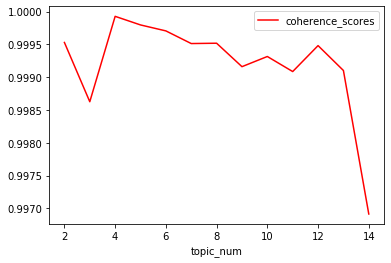

In [78]:
pd.DataFrame(df_performance).plot(kind='line',x='topic_num',y='coherence_scores',color='red')
plt.show()

In [ ]:
# Performance using Neural Network